In [ ]:
import spacy
"""
Blueprint of preprocessing and lemmatization for the Natural language 
processing

Args:
  doc: List of the sentences

Returns: 
  final_token : The list of the words

"""

class Preprocessing():
  def __init__(self, doc):
    """Inits the Preprocessing"""
    self.doc = doc
  
  def cleanData(self, doc):
    """Clean the data by removing stop words punctuvation"""
    nlp = spacy.load('en_core_web_sm')
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    # print(tokens)
    return tokens

  def lemmatization(self, tokens):
    """Lemmatiz the data"""
      # self.tokens = tokens
      final_token = [token.lemma_ for token in tokens]
      # print(" ".join(final_token))
      return final_token #" ".join(final_token)
 
  def run_all(self):
    """Run all the methods as per the requirments"""
    tokens = self.cleanData(self.doc)
    final_token = self.lemmatization(tokens)
    return final_token

doc = ("Find Alternatives To Pagerduty at Shopwebly, the Website to Compare Prices! Find and Compare Alternatives To Pagerduty Online. Save Now at Shopwebly! Many Products. Quick Results. Easy Access. Compare Products. Search and Discover   ")
preprocessing = Preprocessing(doc)
preprocessing.run_all()

['find',
 'alternative',
 'pagerduty',
 'shopwebly',
 'website',
 'compare',
 'price',
 'find',
 'compare',
 'alternative',
 'pagerduty',
 'online',
 'save',
 'shopwebly',
 'product',
 'quick',
 'result',
 'easy',
 'access',
 'compare',
 'product',
 'search',
 'discover',
 '  ']

In [ ]:
! pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 13.0 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 56.8 MB/s 
     |████████████████████████████████| 438 kB 74.0 MB/s 
     |████████████████████████████████| 5.9 MB 55.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

Epoch 1/2
131/131 [==============================] - 51s 314ms/step - loss: 0.3252 - accuracy: 0.8641 - precision: 0.4231 - recall: 0.0393
Epoch 2/2
44/44 [==============================] - 14s 313ms/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1206
           1       0.90      0.35      0.51       187

    accuracy                           0.91      1393
   macro avg       0.91      0.67      0.73      1393
weighted avg       0.91      0.91      0.89      1393



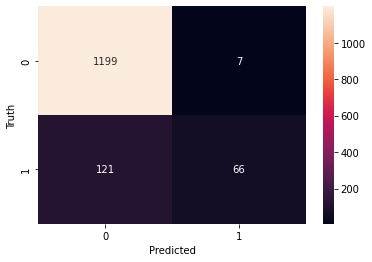

In [ ]:
######   BERT model, ALBERT - A Lite BERT model  and  RoBERTa - Robustly Optimized BERT Pretraining Approach   ############
import spacy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn


"""
Blueprint of Bidirectional Encoder Representations from Transformers. BERT is a transformer-based machine learning technique for \
natural language processing.

Args:
  bert_preprocess : preprocess URL link
  bert_encoder : encoder URL link
  df_balanced : dataframe name
  text_column : text column name
  label_column : target column name
  epochs : number of epochs

Returns: 
  model : BERT model

"""

class BERT():
  def __init__(self, bert_preprocess, bert_encoder, df_balanced, text_column, label_column, epochs):
    """Inits the BERT"""
    self.bert_preprocess = bert_preprocess
    self.bert_encoder = bert_encoder
    self.df_balanced = df_balanced
    self.text_column = text_column
    self.label_column = label_column
    self.epochs = epochs

  
  def func_bert(self, bert_preprocess, bert_encoder, df_balanced, text_column, label_column, epochs):
    """Perform the Bidirectional Encoder Representations from Transformers"""
    # Split it into training and test data set
    X_train, X_test, y_train, y_test = train_test_split(df_balanced[text_column], df_balanced[label_column], stratify=df_balanced['spam'])


    # Bert layers
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = bert_preprocess(text_input)
    outputs = bert_encoder(preprocessed_text)

    # Neural network layers
    l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
    l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

    # Use inputs and outputs to construct a final model
    model = tf.keras.Model(inputs=[text_input], outputs = [l])

    #model.summary()
    METRICS = [
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=METRICS)

    # train the model
    model.fit(X_train, y_train, epochs=epochs)
    
    y_predicted = model.predict(X_test)
    y_predicted = y_predicted.flatten()

    y_predicted = np.where(y_predicted > 0.5, 1, 0)

    print(classification_report(y_test, y_predicted)) 
    cm = confusion_matrix(y_test, y_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    return model
 
  def run_all(self):
    """Run all the methods as per the requirements"""
    model = self.func_bert(self.bert_preprocess, self.bert_encoder, self.df_balanced, self.text_column, self.label_column, self.epochs)
    return model

# import BERT model
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# #import ALBERT - A Lite BERT model
# bert_preprocess = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3")

# #import RoBERTa - Robustly Optimized BERT Pretraining Approach
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1")


df = pd.read_csv("SMSCollection.csv")
df.head()

df_balanced = df
df_balanced['spam']=df_balanced['Class'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.head()

#class Bert 
bertExe = BERT(bert_preprocess,  bert_encoder, df_balanced, 'sms', 'spam', 2)
model = bertExe.run_all()


In [ ]:
{
  "Bert":{
    "preprocess" : "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3",
    "encoder" : "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
    },
 
 "Albert":{
    "preprocess" : "http://tfhub.dev/tensorflow/albert_en_preprocess/3",
    "encoder" : "https://tfhub.dev/tensorflow/albert_en_base/3"
    },
 
 "RoBERTa":{
    "preprocess" : "http://tfhub.dev/tensorflow/albert_en_preprocess/3",
    "encoder" : "https://tfhub.dev/tensorflow/albert_en_base/3"
   }
 }

In [ ]:
##############    GloVe-Contextualized Vectors uisng LSTM    #######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
plt.style.use('ggplot')

import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l1
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,RNN, LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
stop=set(stopwords.words('english'))

"""
GloVe stands for Global Vectors for word representation. It is an unsupervised 
learning algorithm. Global Vectors  generate word embeddings by aggregating 
global word co-occurrence matrices from a given corpus.

Args:
  embedding_dict : Embedding dictionary
  df : Dataframe name
  column  : Text column name

Returns: 
  model : GloVe-Contextualized Vectors with LSTM model

"""
class GloVe():
  def __init__(self, embedding_dict, df, sms):
    """Inits the GloVe"""
    self.embedding_dict = embedding_dict
    self.df = df
    self.sms = sms

  # clean text
  def clean_text(self, text):
    """Clean the text"""
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    text = text.split(' ')      
    text = [w for w in text if not w in set(stopwords.words('english'))] 
    text = ' '.join(text)            
    return text

  # create the corpus GloVe 
  def create_corpus(self, df):
      """Create the corpus"""
      corpus=[]
      for tweet in tqdm(df['clean_sms']):
          words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
          corpus.append(words)
      return corpus
  
  def run_all(self):
    """Run all the methods as per the requirements"""
    df['clean_sms'] = df['sms'].apply(lambda x : self.clean_text(x))

    # padding
    MAX_LEN=10
    tokenizer_obj=Tokenizer()

    corpus=self.create_corpus(df)
    tokenizer_obj.fit_on_texts(corpus)
    sequences=tokenizer_obj.texts_to_sequences(corpus)

    email_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

    word_index=tokenizer_obj.word_index

    # Embedding
    num_words=len(word_index)+1
    embedding_matrix=np.zeros((num_words,50))

    for word, i in tqdm(word_index.items()):
        if i > num_words:
            continue
        
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec

    # Dataset split
    X_train,X_val, y_train, y_val = train_test_split(email_pad,df.spam, test_size=.2, random_state=2)

    # Create Model.
    model=Sequential()

    embedding_layer=Embedding(num_words,50,embeddings_initializer=Constant(embedding_matrix),
                      input_length=MAX_LEN,trainable=False)

    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
    model.add(tf.keras.layers.LSTM(32,return_sequences=True))
    model.add(tf.keras.layers.LSTM(16))
    model.add(tf.keras.layers.Dense(16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimzer=Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['acc'])
    # model.summary()

    #Fitting The Model
    history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_val,y_val),verbose=1)

    y_predicted = model.predict(X_val)
    y_predicted = y_predicted.flatten()

    y_predicted = np.where(y_predicted > 0.5, 1, 0)

    print(classification_report(y_val, y_predicted))
    
    return model


embedding_dict={}
with open('glove.6B.50d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

df = pd.read_csv("SMSCollection.csv")
df['spam']=df['Class'].replace({'ham':0,'spam':1})
df = df.head(100)
df.head()


GloVeExe = GloVe(embedding_dict, df, 'sms')
model = GloVeExe.run_all()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 608/608 [00:00<00:00, 167222.09it/s]


Epoch 1/10
3/3 [==============================] - 8s 624ms/step - loss: 0.7139 - acc: 0.2125 - val_loss: 0.7130 - val_acc: 0.0500
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 0.7045 - acc: 0.2125 - val_loss: 0.7063 - val_acc: 0.1500
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 0.7022 - acc: 0.3500 - val_loss: 0.7004 - val_acc: 0.2500
Epoch 4/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6968 - acc: 0.4250 - val_loss: 0.6954 - val_acc: 0.4000
Epoch 5/10
3/3 [==============================] - 0s 41ms/step - loss: 0.6938 - acc: 0.5375 - val_loss: 0.6910 - val_acc: 0.6000
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6892 - acc: 0.6000 - val_loss: 0.6872 - val_acc: 0.7500
Epoch 7/10
3/3 [==============================] - 0s 42ms/step - loss: 0.6884 - acc: 0.6125 - val_loss: 0.6837 - val_acc: 0.9000
Epoch 8/10
3/3 [==============================] - 0s 35ms/step - loss: 0.6883 - acc: 0.6500 - va

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##############    GloVe-Contextualized Vectors uisng RNN    #######################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
plt.style.use('ggplot')

import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l1
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,RNN, SimpleRNN,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
stop=set(stopwords.words('english'))

class GloVe():
  """
  GloVe stands for Global Vectors for word representation. It is an unsupervised 
  learning algorithm. Global Vectors  generate word embeddings by aggregating 
  global word co-occurrence matrices from a given corpus.

  Args:
  embedding_dict : Embedding dictionary
  df : Dataframe name
  column  : Text column name

  Returns: 
    model : GloVe-Contextualized Vectors with SimpleRNN model
  
  """
  def __init__(self, embedding_dict, df, sms):
    """ Inits the Preprocessing """
    self.embedding_dict = embedding_dict
    self.df = df
    self.sms = sms

  # clean text
  def clean_text(self, text):
    """Clean the text"""
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    text = text.split(' ')      
    text = [w for w in text if not w in set(stopwords.words('english'))] 
    text = ' '.join(text)            
    return text

  # create the corpus GloVe 
  def create_corpus(self, df):
      """ create the corpus GloVe """
      corpus=[]
      for tweet in tqdm(df['clean_sms']):
          words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
          corpus.append(words)
      return corpus
  
  def run_all(self):
    """ Run all the methods as per the requirements """
    df['clean_sms'] = df['sms'].apply(lambda x : self.clean_text(x))

    # padding
    MAX_LEN=10
    tokenizer_obj=Tokenizer()

    corpus=self.create_corpus(df)
    tokenizer_obj.fit_on_texts(corpus)
    sequences=tokenizer_obj.texts_to_sequences(corpus)

    email_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

    word_index=tokenizer_obj.word_index

    # Embedding
    num_words=len(word_index)+1
    embedding_matrix=np.zeros((num_words,50))

    for word, i in tqdm(word_index.items()):
        if i > num_words:
            continue
        
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec

    # Dataset split
    X_train,X_val, y_train, y_val = train_test_split(email_pad,df.spam, test_size=.2, random_state=2)

    # Create Model.
    model=Sequential()

    embedding_layer=Embedding(num_words,50,embeddings_initializer=Constant(embedding_matrix),
                      input_length=MAX_LEN,trainable=False)

    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.2))
    model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
    model.add(tf.keras.layers.SimpleRNN(32,return_sequences=True))
    model.add(tf.keras.layers.SimpleRNN(16))
    model.add(tf.keras.layers.Dense(16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimzer=Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['acc'])
    # model.summary()

    #Fitting The Model
    history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_val,y_val),verbose=1)

    y_predicted = model.predict(X_val)
    y_predicted = y_predicted.flatten()

    y_predicted = np.where(y_predicted > 0.5, 1, 0)

    print(classification_report(y_val, y_predicted))
    
    return model


embedding_dict={}
with open('glove.6B.50d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

df = pd.read_csv("SMSCollection.csv")
df['spam']=df['Class'].replace({'ham':0,'spam':1})
df = df.head(100)
df.head()


GloVeExe = GloVe(embedding_dict, df, 'sms')
model = GloVeExe.run_all()

In [1]:
#######  Doc2Vec  #########

import gensim
import gensim.downloader as api
"""
Doc2vec is an NLP tool for representing documents as a vector and is a generalizing of the word2vec method.
Args:
  doc: List of the sentences

Returns: 
  model : Doc2Vec Model

"""
class Doc2Vec():
  def __init__(self, doc):
    """Inits the Preprocessing"""
    self.doc = doc
  
  ######
  def tagged_document(self, list_of_list_of_words):
    """tagged the documents"""
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
    # data_for_training = list(tagged_document(doc))

    # return data_for_training

  def doc2vec_model_train(self,data_for_training):
    """doc2vec model"""
    # Initialise the Model
    model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)

    # build the vocabulary
    model.build_vocab(data_for_training)

    # train the Doc2Vec model
    model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

    return model
 
  def run_all(self):
    """Run all the methods as per the requirements"""
    # data_for_training = self.tagged_document(self.doc)
    model = self.doc2vec_model_train(list(self.tagged_document(self.doc)))
    return model


#Download the Dataset
dataset = api.load("text8")
data = [d for d in dataset]


doc2vec = Doc2Vec(data)
model = doc2vec.run_all()
model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization'])


[==================================================] 100.0% 31.6/31.6MB downloaded


array([ 0.09527239, -0.30841684,  0.1721609 ,  0.10372017,  0.17012785,
       -0.05623797,  0.11417595, -0.18692602,  0.26557827, -0.11793958,
       -0.23201188,  0.24393639,  0.02137129,  0.00878783, -0.14745054,
       -0.19472069,  0.1455558 , -0.06151609,  0.2699784 , -0.24014671,
       -0.11460411,  0.15342708,  0.12222952,  0.16881798, -0.04026898,
        0.26504946, -0.06621742, -0.42141995, -0.10061757, -0.0265855 ,
       -0.25427124, -0.36587232,  0.01036259, -0.17440367,  0.02230715,
       -0.10369407,  0.06219948,  0.13727365,  0.06151349,  0.17567234],
      dtype=float32)

In [ ]:
###########   Encoder-Decoder   ##############

import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from keras.preprocessing.text import Tokenizer

# Load the input features

def load_train(file_name):
    pd.set_option('display.max_colwidth',None)
    train =pd.read_csv(file_name) 
    train=train.dropna()
    return train
    
train_df = load_train("SMSCollection.csv")
# train_df = train_df.head(100)
train_df['spam']=train_df['Class'].apply(lambda x: 1 if x=='spam' else 0)
X = train_df['sms'] # input
y = train_df[['spam']].values # target /label

sentences_train,sentences_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=11)

tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_val = tokenizer.texts_to_sequences(sentences_val)

# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1 # (in case of pre-trained embeddings it's +2)                         
maxlen = 131 # sentence length

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

maxlen = 131
max_features = 50000
embed_size = 131

encoder_inp   = Input(shape=(maxlen,))
encoder_embed = Embedding(max_features,embed_size,input_length=maxlen,trainable=True)(encoder_inp)
encoder_lstm_cell = LSTM(60,return_state='True')
encoder_output,encoder_state_h,encoder_state_c = encoder_lstm_cell(encoder_embed)
#Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
decoder_inp   = Input(shape=(maxlen,))
decoder_embed = Embedding(max_features,embed_size,input_length=maxlen,trainable=True)(decoder_inp)
decoder_lstm_cell = LSTM(60,return_sequences='True',return_state=True)
decoder_output,decoder_state_h,decoder_state_c = decoder_lstm_cell(decoder_embed,initial_state=[encoder_state_h,encoder_state_c])
decoder_dense_cell1 = Dense(16,activation='relu')
decoder_d_output    = decoder_dense_cell1(decoder_output)
decoder_dense_cell2 = Dense(1,activation='sigmoid')
decoder_output = decoder_dense_cell2(decoder_d_output)
model = Model([encoder_inp,decoder_inp],decoder_output) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()
history = model.fit([X_train,X_train],y_train,batch_size=1024,epochs=2)



In [ ]:
#####   Bag Of Words    ##############

from sklearn.feature_extraction.text import CountVectorizer

def func_baf_of_words(docList):
  vectorizer = CountVectorizer(stop_words='english')
  X = vectorizer.fit_transform(docList)
  df_bow = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
  return df_bow

docList = ['the man went out for a walk', 'the children sat around the fire', 'Game of Thrones is an amazing tv series!', 'Game of Thrones is the best tv series!', 'Game of Thrones is so great']
result = func_baf_of_words(docList)
result

,amazing,best,children,game,great,man,sat,series,thrones,tv,walk,went
0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,1,1,1,0,0
3,0,1,0,1,0,0,0,1,1,1,0,0
4,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
#####   Bag Of Words with N_grams   #############

from sklearn.feature_extraction.text import CountVectorizer

def func_baf_of_words(docList, ngram_range=(2,2)):
  vectorizer = CountVectorizer(stop_words='english', ngram_range= ngram_range)
  X = vectorizer.fit_transform(docList)
  df_bow = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
  return df_bow

docList = ['the man went out for a walk', 'the children sat around the fire', 'Game of Thrones is an amazing tv series!', 'Game of Thrones is the best tv series!', 'Game of Thrones is so great']
result = func_baf_of_words(docList, (3,3))
result

In [ ]:
####  TfidfVectorizer   ############
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def func_tfidf(docList):
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform(docList)
  feature_names = vectorizer.get_feature_names()
  dense = vectors.todense()
  denselist = dense.tolist()
  df = pd.DataFrame(denselist, columns=feature_names)
  return df

docList = ['the man went out for a walk', 'the children sat around the fire', 'Game of Thrones is an amazing tv series!', 'Game of Thrones is the best tv series!', 'Game of Thrones is so great']
func_tfidf(docList)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amazing,an,around,best,children,fire,for,game,great,is,...,of,out,sat,series,so,the,thrones,tv,walk,went
0,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.428411,0.000000,0.000000,0.000000,...,0.000000,0.428411,0.00000,0.000000,0.000000,0.286912,0.000000,0.000000,0.428411,0.428411
1,0.000000,0.000000,0.41544,0.000000,0.41544,0.41544,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.41544,0.000000,0.000000,0.556451,0.000000,0.000000,0.000000,0.000000
2,0.442986,0.442986,0.00000,0.000000,0.00000,0.00000,0.000000,0.296673,0.000000,0.296673,...,0.296673,0.000000,0.00000,0.357398,0.000000,0.000000,0.296673,0.357398,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.469096,0.00000,0.00000,0.000000,0.314159,0.000000,0.314159,...,0.314159,0.000000,0.00000,0.378464,0.000000,0.314159,0.314159,0.378464,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.343824,0.513391,0.343824,...,0.343824,0.000000,0.00000,0.000000,0.513391,0.000000,0.343824,0.000000,0.000000,0.000000


In [ ]:
########    Word2Vec Model   ##############

import pandas as pd
import gensim


df = pd.read_csv("SMSCollection.csv")
#df.head()


def func_word_2_vec(df, column_name):
  #Simple Preprocessing & Tokenization
  df['review_text'] = df[column_name].apply(gensim.utils.simple_preprocess)

  # Initialized the Word2Vec Model
  model = gensim.models.Word2Vec(window=10, min_count=2, workers=4,)

  # Build vocabulary 
  model.build_vocab(df['review_text'], progress_per=1000)

  #Train the Word2Vec Model
  model.train(df['review_text'], total_examples=model.corpus_count, epochs=model.epochs)

  return model


model = func_word_2_vec(df, 'sms')

# Finding Similar Words and Similarity between words
model.wv.most_similar("crazy")

[('just', 0.9997512698173523),
 ('yes', 0.9997451305389404),
 ('more', 0.999728262424469),
 ('with', 0.9997220635414124),
 ('get', 0.9997200965881348),
 ('games', 0.9997031688690186),
 ('by', 0.9996980428695679),
 ('until', 0.9996848106384277),
 ('liao', 0.9996798038482666),
 ('play', 0.999678373336792)]